In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.neighbors import KernelDensity
from mpl_toolkits.mplot3d import Axes3D

In [118]:
# Load your CSV file
df = pd.read_csv('Data-without-Pos_2024-12-16.csv')

# Show the first few rows to inspect the data
print(df.head())


   gaze_X   gaze_Y   fixationTime
0     227        0              0
1     226        0             12
2     225        0             23
3     223        0             34
4     221        1             45


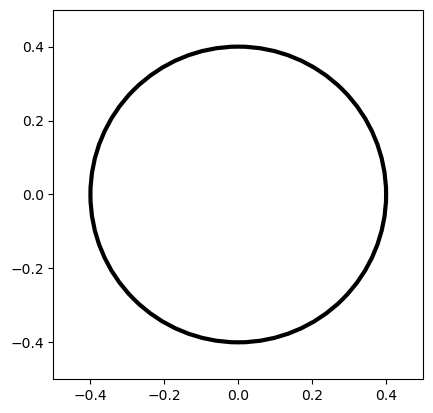

In [120]:
# Strip any leading/trailing spaces from the column names
df.columns = df.columns.str.strip()

# Extract X and Y coordinates from the CSV
x = df['gaze_X'].values
y = df['gaze_Y'].values

# Normalize the gaze_X and gaze_Y values to be between 0 and 1
x_min, x_max = x.min(), x.max()
y_min, y_max = y.min(), y.max()

x_normalized = (x - x_min) / (x_max - x_min)  # Scale x to [0, 1]
y_normalized = (y - y_min) / (y_max - y_min)  # Scale y to [0, 1]

# Shift the coordinates so that the center of the eye is at (0.5, 0.5)
# We want (0.5, 0.5) to be the center, so we shift the normalized data
x_centered = x_normalized - 0.5  # Shift the x values
y_centered = y_normalized - 0.5  # Shift the y values

# Set up the figure and axis
fig, ax = plt.subplots()

# Create the eyeball (a circle for simplicity)
eyeball = plt.Circle((0, 0), 0.4, color='white', ec='black', lw=3, zorder=0)  # Center at (0,0)
ax.add_artist(eyeball)

# Create the pupil as a small green dot (better contrast)
pupil, = ax.plot([], [], 'go', markersize=10)  # 'go' for green dot

# Set axis limits to match the normalized size [0, 1] and center the eyeball
ax.set_xlim(-0.5, 0.5)  # Now range from -0.5 to 0.5 centered around 0
ax.set_ylim(-0.5, 0.5)  # Now range from -0.5 to 0.5 centered around 0

# Ensure the aspect ratio is equal so the circle is not distorted
ax.set_aspect('equal', adjustable='box')

# Initialize function: this will set the initial state of the animation
def init():
    pupil.set_data([], [])  # Empty the pupil's data initially
    return pupil,

# Animation function: this will update the pupil's position for each frame
def update(frame):
    x_frame, y_frame = frame  # Extract both x and y coordinates
    pupil.set_data(x_frame, y_frame)  # Update the pupil's position
    return pupil,

# Convert the zip object to a list so FuncAnimation can infer the number of frames
frames_list = list(zip(x_centered, y_centered))

# Create the animation
ani = FuncAnimation(fig, update, frames=frames_list, init_func=init, blit=True, interval=100)

# Show the animation
plt.show()

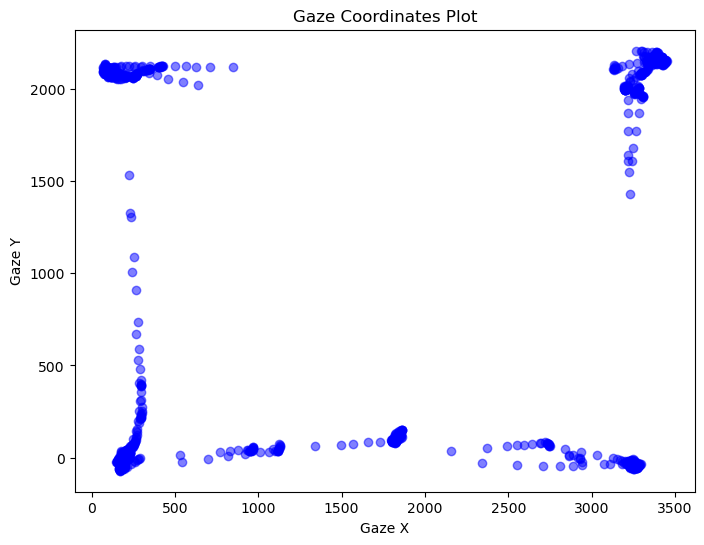

In [122]:
# Extracting from CSV columns 'gaze_X' and 'gaze_Y'
x = df['gaze_X']
y = df['gaze_Y']

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c='blue', alpha=0.5)  # Scatter plot of gaze_X vs gaze_Y

# Adding labels and title
plt.xlabel('Gaze X')
plt.ylabel('Gaze Y')
plt.title('Gaze Coordinates Plot')

# Show the plot
plt.show()

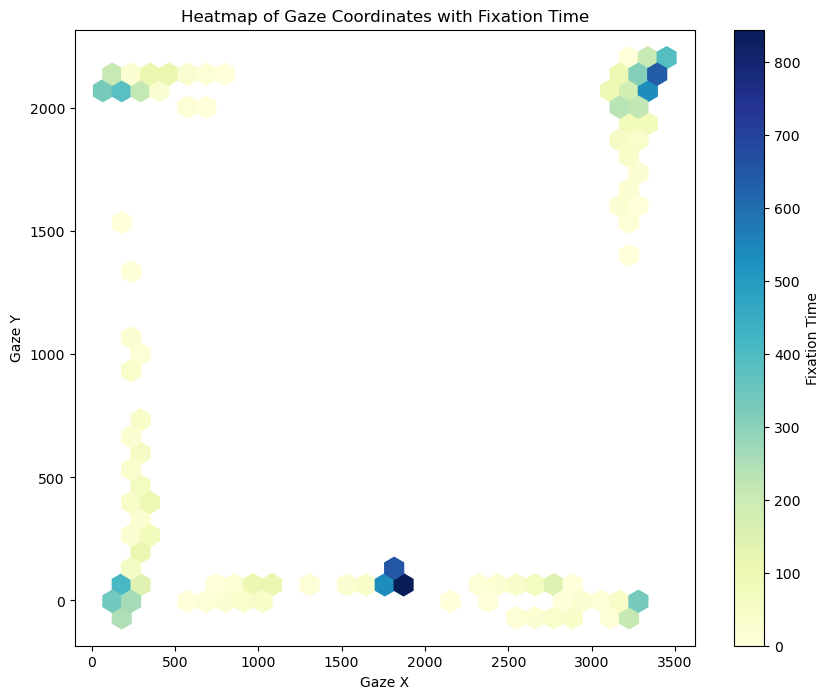

In [124]:
# Ensure fixationTime is numeric (convert any non-numeric values to NaN)
df['fixationTime'] = pd.to_numeric(df['fixationTime'], errors='coerce')

# Handle any missing or NaN values in fixationTime by filling them with a default value (optional)
df['fixationTime'].fillna(0, inplace=True)

# Extract gaze_X, gaze_Y, and fixationTime columns
x = df['gaze_X']
y = df['gaze_Y']
fixation_time = df['fixationTime']

# Create a hexbin plot (heatmap) to visualize gaze density with fixation time as color intensity
plt.figure(figsize=(10, 8))
hb = plt.hexbin(x, y, C=fixation_time, gridsize=30, cmap='YlGnBu')

# Adding color bar to indicate fixation time
plt.colorbar(hb, label='Fixation Time')

# Adding labels and title
plt.xlabel('Gaze X')
plt.ylabel('Gaze Y')
plt.title('Heatmap of Gaze Coordinates with Fixation Time')

# Show the plot
plt.show()

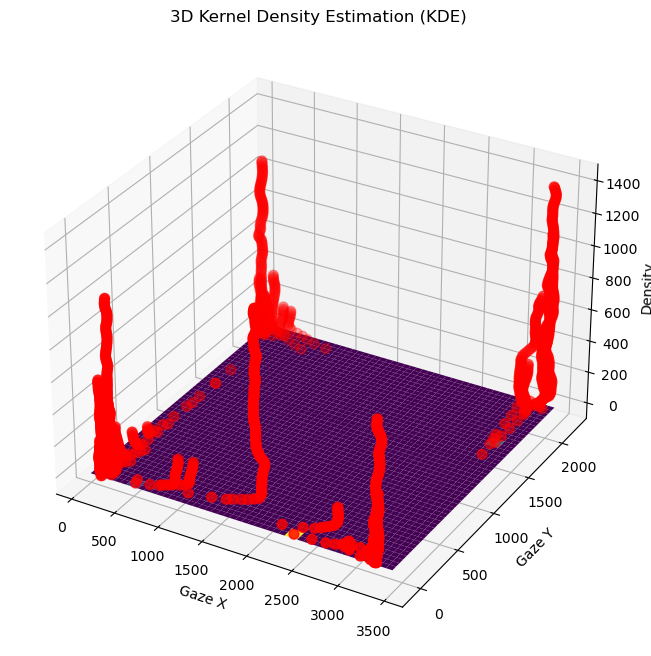

In [126]:
# Extract gaze_X, gaze_Y, and fixationTime from the DataFrame
gaze_X = df['gaze_X'].values
gaze_Y = df['gaze_Y'].values
fixationTime = df['fixationTime'].values

# Combine these columns into a single 3D array (n_samples x 3)
gaze_data = np.vstack([gaze_X, gaze_Y, fixationTime]).T

# Fit KDE to the 3D data
kde = KernelDensity(kernel='gaussian', bandwidth=2.0)
kde.fit(gaze_data)

# Create a grid of points where we want to evaluate the density
x, y, z = np.meshgrid(
    np.linspace(min(gaze_data[:, 0]), max(gaze_data[:, 0]), 50),
    np.linspace(min(gaze_data[:, 1]), max(gaze_data[:, 1]), 50),
    np.linspace(min(gaze_data[:, 2]), max(gaze_data[:, 2]), 50)
)

# Flatten the grid and evaluate the density
grid_points = np.vstack([x.ravel(), y.ravel(), z.ravel()]).T
log_density = kde.score_samples(grid_points)
density = np.exp(log_density)

# Reshape the density to match the grid shape
density = density.reshape(x.shape)

# Visualize the 3D density
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the density surface (you can adjust which slice of the 3D data you want to show)
ax.plot_surface(x[:, :, 0], y[:, :, 0], density[:, :, 0], cmap='viridis', edgecolor='none')

# Optional: Plot the original data points on the surface
ax.scatter(gaze_data[:, 0], gaze_data[:, 1], gaze_data[:, 2], c='red', s=50, label="Data points")

# Labels and title
ax.set_xlabel('Gaze X')
ax.set_ylabel('Gaze Y')
ax.set_zlabel('Density')
ax.set_title('3D Kernel Density Estimation (KDE)')

plt.show()


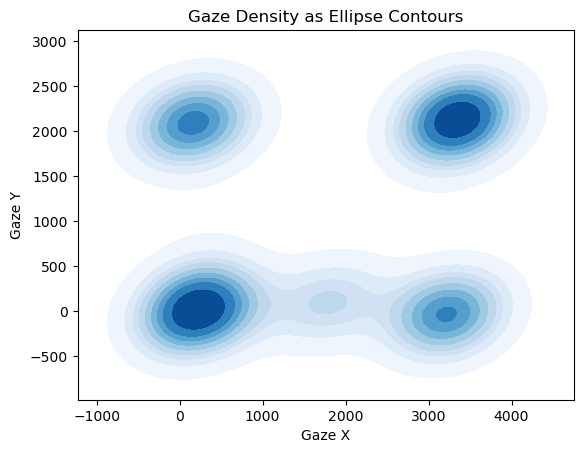

In [127]:
gaze_X = df['gaze_X']
gaze_Y = df['gaze_Y']
# Create a KDE plot
sns.kdeplot(x=gaze_X, y=gaze_Y, cmap='Blues', fill=True, levels=10)
plt.title("Gaze Density as Ellipse Contours")
plt.xlabel("Gaze X")
plt.ylabel("Gaze Y")
plt.show()